# 국가(대륙)별/상품군별 온라인쇼핑 해외직접 판매액

* 국가 통계 포털
http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE[…]ang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

# * 필요한 라이브러리 가져오기

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

#한글폰트를 OS별로 설정
#한글폰트 깨짐 방지 코드
if os.name == 'posix':
    #Mac
    sns.set(font='AppleGothic')
elif os.name == 'nt':
    #Window
    sns.set(font="Malgun Gothic")

#한글폰트 깨짐 방지 - 더 간단한 코드
#plt.rc('font', family='Malgun Gothic')
#plt.rc('axes', unicode_minus=False)

# 글씨 선명하게. 폰트의 주변이 흐릿하게 보이는 것을 방지
%config InlineBackend.figure_format = 'retina'



# * 데이터 로드하기

In [3]:
df_raw = pd.read_csv('./국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20220801090642.csv', encoding='cp949')

df_raw.shape

(450, 5)

In [4]:
df_raw

,국가(대륙)별,상품군별,판매유형별,2021.4/4,2022.1/4 p)
0,합계,합계,계,926718,567701
1,합계,합계,면세점,681168,363520
2,합계,합계,면세점 이외,245550,204181
3,합계,컴퓨터 및 주변기기,계,2707,2449
4,합계,컴퓨터 및 주변기기,면세점,0,0
...,...,...,...,...,...
445,기타,생활용품 및 자동차용품,면세점,0,0
446,기타,생활용품 및 자동차용품,면세점 이외,1081,267
447,기타,기 타,계,1076,2309
448,기타,기 타,면세점,0,0


## 데이터 미리보기

In [235]:
df_raw.head()

,국가(대륙)별,상품군별,판매유형별,2021.4/4,2022.1/4 p)
0,합계,합계,계,926718,567701
1,합계,합계,면세점,681168,363520
2,합계,합계,면세점 이외,245550,204181
3,합계,컴퓨터 및 주변기기,계,2707,2449
4,합계,컴퓨터 및 주변기기,면세점,0,0


In [236]:
df_raw.tail()

,국가(대륙)별,상품군별,판매유형별,2021.4/4,2022.1/4 p)
445,기타,생활용품 및 자동차용품,면세점,0,0
446,기타,생활용품 및 자동차용품,면세점 이외,1081,267
447,기타,기 타,계,1076,2309
448,기타,기 타,면세점,0,0
449,기타,기 타,면세점 이외,1076,2309


## 데이터 요약하기

In [237]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   국가(대륙)별      450 non-null    object
 1   상품군별         450 non-null    object
 2   판매유형별        450 non-null    object
 3   2021.4/4     450 non-null    int64 
 4   2022.1/4 p)  450 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 17.7+ KB


In [238]:
df_raw.describe()

,2021.4/4,2022.1/4 p)
count,450.000000,450.000000
mean,16474.986667,10092.462222
std,96218.801582,52060.707011
min,0.000000,0.000000
25%,0.000000,0.000000
50%,75.000000,31.000000
75%,1361.250000,992.750000
max,926718.000000,567701.000000


## 데이터 결측치 확인하기

In [239]:
df_raw.isnull().sum()

국가(대륙)별        0
상품군별           0
판매유형별          0
2021.4/4       0
2022.1/4 p)    0
dtype: int64

In [240]:
df_raw.isnull().sum().sum()

0

In [241]:
df_raw.shape

(450, 5)

In [242]:
df_raw.sample()

,국가(대륙)별,상품군별,판매유형별,2021.4/4,2022.1/4 p)
447,기타,기 타,계,1076,2309


In [243]:
df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2021.4/4', '2022.1/4 p)'], dtype='object')

In [244]:
len(df_raw.columns)

5

## 특정열만 찾아 로드하기

In [245]:
# '국가(대륙)별' 데이터 로드하기
df_raw['국가(대륙)별']

0      합계
1      합계
2      합계
3      합계
4      합계
       ..
445    기타
446    기타
447    기타
448    기타
449    기타
Name: 국가(대륙)별, Length: 450, dtype: object

### 데이터 로드 후 반드시 type 확인

In [246]:
# type확인
#  Series
#  온점'.' 은 명령어
type(df_raw['국가(대륙)별']) 

pandas.core.series.Series

In [247]:
# 국가대륙별 데이터 빈도수 세기
df_raw['국가(대륙)별'].value_counts() 

합계            45
미국            45
중국            45
일본            45
아세안(ASEAN)    45
유럽연합(EU)      45
중동            45
중남미           45
대양주           45
기타            45
Name: 국가(대륙)별, dtype: int64

In [248]:
df_raw['상품군별'].value_counts()

합계              30
컴퓨터 및 주변기기      30
가전·전자·통신기기      30
소프트웨어           30
서 적             30
사무·문구           30
음반·비디오·악기       30
의류 및 패션 관련상품    30
스포츠·레저용품        30
화장품             30
아동·유아용품         30
음·식료품           30
농축수산물           30
생활용품 및 자동차용품    30
기 타             30
Name: 상품군별, dtype: int64

In [249]:
# 판매유형별 데이터 로드하기
df_raw['판매유형별']

0           계
1         면세점
2      면세점 이외
3           계
4         면세점
        ...  
445       면세점
446    면세점 이외
447         계
448       면세점
449    면세점 이외
Name: 판매유형별, Length: 450, dtype: object

In [250]:
# 판매유형별 데이터 빈도수 세기
df_raw['판매유형별'].value_counts()

계         150
면세점       150
면세점 이외    150
Name: 판매유형별, dtype: int64

In [251]:
# type 확인
type(df_raw['판매유형별'])

pandas.core.series.Series

In [252]:
df_raw['2021.4/4'].value_counts()

0         135
1          12
16          6
9           6
63          5
         ... 
76          1
7816        1
4937        1
4850        1
926718      1
Name: 2021.4/4, Length: 191, dtype: int64

In [253]:
df_raw['2022.1/4 p)'].value_counts()

0         154
1          14
2          11
10          6
7           4
         ... 
1875        1
358933      1
18248       1
2949        1
567701      1
Name: 2022.1/4 p), Length: 171, dtype: int64

In [297]:
# 미국 데이터만 보기
df_raw['국가(대륙)별']

0      합계
1      합계
2      합계
3      합계
4      합계
       ..
445    기타
446    기타
447    기타
448    기타
449    기타
Name: 국가(대륙)별, Length: 450, dtype: object

In [254]:
# df_raw['국가(대륙)별'] 에서 미국이 True니?
df_raw['국가(대륙)별'] == '미국'

0      False
1      False
2      False
3      False
4      False
       ...  
445    False
446    False
447    False
448    False
449    False
Name: 국가(대륙)별, Length: 450, dtype: bool

In [255]:
type(df_raw['국가(대륙)별'] == '미국')

pandas.core.series.Series

In [256]:
# [df_raw['국가(대륙)별'] 에서 미국이 True인 것]만 뽑기
df_raw[df_raw['국가(대륙)별'] == '미국']

,국가(대륙)별,상품군별,판매유형별,2021.4/4,2022.1/4 p)
45,미국,합계,계,67036,50156
46,미국,합계,면세점,108,127
47,미국,합계,면세점 이외,66928,50029
48,미국,컴퓨터 및 주변기기,계,731,656
49,미국,컴퓨터 및 주변기기,면세점,0,0
50,미국,컴퓨터 및 주변기기,면세점 이외,731,656
51,미국,가전·전자·통신기기,계,699,209
52,미국,가전·전자·통신기기,면세점,1,0
53,미국,가전·전자·통신기기,면세점 이외,698,209
54,미국,소프트웨어,계,323,92


In [257]:
type(df_raw[df_raw['국가(대륙)별'] == '미국'])

pandas.core.frame.DataFrame

In [258]:
# 중동만 추출
df_raw[df_raw['국가(대륙)별'] == '중동']

,국가(대륙)별,상품군별,판매유형별,2021.4/4,2022.1/4 p)
270,중동,합계,계,1051,548
271,중동,합계,면세점,0,0
272,중동,합계,면세점 이외,1051,548
273,중동,컴퓨터 및 주변기기,계,24,1
274,중동,컴퓨터 및 주변기기,면세점,0,0
275,중동,컴퓨터 및 주변기기,면세점 이외,24,1
276,중동,가전·전자·통신기기,계,54,0
277,중동,가전·전자·통신기기,면세점,0,0
278,중동,가전·전자·통신기기,면세점 이외,54,0
279,중동,소프트웨어,계,0,0


In [259]:
#통계보고 미국만 추출
df_usa=df_raw[df_raw['국가(대륙)별'].str.contains('미국')]
df_usa

,국가(대륙)별,상품군별,판매유형별,2021.4/4,2022.1/4 p)
45,미국,합계,계,67036,50156
46,미국,합계,면세점,108,127
47,미국,합계,면세점 이외,66928,50029
48,미국,컴퓨터 및 주변기기,계,731,656
49,미국,컴퓨터 및 주변기기,면세점,0,0
50,미국,컴퓨터 및 주변기기,면세점 이외,731,656
51,미국,가전·전자·통신기기,계,699,209
52,미국,가전·전자·통신기기,면세점,1,0
53,미국,가전·전자·통신기기,면세점 이외,698,209
54,미국,소프트웨어,계,323,92


In [260]:
df_usa.describe()

,2021.4/4,2022.1/4 p)
count,45.000000,45.000000
mean,5958.755556,4458.311111
std,14857.531748,11048.578773
min,0.000000,0.000000
25%,5.000000,6.000000
50%,699.000000,311.000000
75%,3073.000000,2986.000000
max,67036.000000,50156.000000


# * 분석과 시각화를 위한 tidy data 만들기
* https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

<AxesSubplot:xlabel='상품군별', ylabel='2021.4/4'>

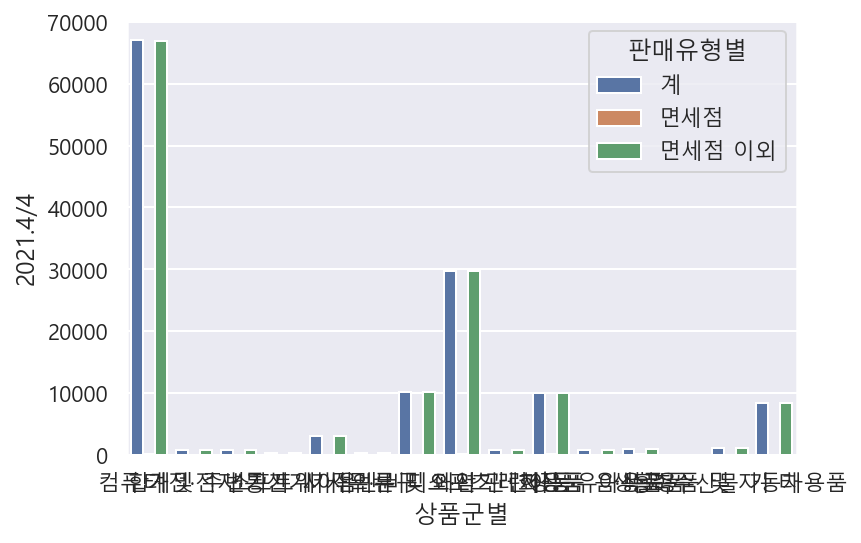

In [261]:
sns.barplot(data=df_usa, x='상품군별', y='2021.4/4', hue='판매유형별')

# * melt fuction

* 정의: melt fuction 이란 'columns을 녹여서 row로 보내는 것'
* 장점: columns에 있던 value값들이 행으로 녹아들어가 해당값을 인덱스별로 추출하기에 용이해짐.

In [262]:
df = pd.DataFrame({'A': ['a1', 'a2', 'a3', 'a4'],
                  'B': ['b1','b2','b3','b4'],
                  'C': [1,2,3,4],
                  'D': [100,200,300,400]})
df

,A,B,C,D
0,a1,b1,1,100
1,a2,b2,2,200
2,a3,b3,3,300
3,a4,b4,4,400


In [263]:
type(df)

pandas.core.frame.DataFrame

### id_var 와 value_vars 란?
* id_vars 기준이 되는 컬럼.
* value_vars 녹여지는 컬럼. 녹아져서 해당 컬럼에 있던 값들이 id_vars 컬럼에 각각 매칭된다. 

In [264]:
# test : melf function
df.melt(id_vars='A', value_vars='B')

,A,variable,value
0,a1,B,b1
1,a2,B,b2
2,a3,B,b3
3,a4,B,b4


### var_name 과 value_name 이란?
* melt한 상태의 컬럼명을 바꾸고자 할 때 사용
* 기존 df.melt() 결과 프레임의 variable과 value 값을 바꿀 때 주로 사용

In [265]:
df.melt(id_vars='A', value_vars='B', var_name="AA", value_name="BB")

,A,AA,BB
0,a1,B,b1
1,a2,B,b2
2,a3,B,b3
3,a4,B,b4


In [266]:
# test : melt function
df = df_raw.melt(id_vars=['국가(대륙)별', '상품군별', '판매유형별'],
                 var_name='기간', value_name='million')
df

,국가(대륙)별,상품군별,판매유형별,기간,million
0,합계,합계,계,2021.4/4,926718
1,합계,합계,면세점,2021.4/4,681168
2,합계,합계,면세점 이외,2021.4/4,245550
3,합계,컴퓨터 및 주변기기,계,2021.4/4,2707
4,합계,컴퓨터 및 주변기기,면세점,2021.4/4,0
...,...,...,...,...,...
895,기타,생활용품 및 자동차용품,면세점,2022.1/4 p),0
896,기타,생활용품 및 자동차용품,면세점 이외,2022.1/4 p),267
897,기타,기 타,계,2022.1/4 p),2309
898,기타,기 타,면세점,2022.1/4 p),0


# * 데이터 전처리

## 1. 기간에서 연도를 분리하기

In [267]:
df

,국가(대륙)별,상품군별,판매유형별,기간,million
0,합계,합계,계,2021.4/4,926718
1,합계,합계,면세점,2021.4/4,681168
2,합계,합계,면세점 이외,2021.4/4,245550
3,합계,컴퓨터 및 주변기기,계,2021.4/4,2707
4,합계,컴퓨터 및 주변기기,면세점,2021.4/4,0
...,...,...,...,...,...
895,기타,생활용품 및 자동차용품,면세점,2022.1/4 p),0
896,기타,생활용품 및 자동차용품,면세점 이외,2022.1/4 p),267
897,기타,기 타,계,2022.1/4 p),2309
898,기타,기 타,면세점,2022.1/4 p),0


In [268]:
df['연도']=df['기간']
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도
0,합계,합계,계,2021.4/4,926718,2021.4/4
1,합계,합계,면세점,2021.4/4,681168,2021.4/4
2,합계,합계,면세점 이외,2021.4/4,245550,2021.4/4
3,합계,컴퓨터 및 주변기기,계,2021.4/4,2707,2021.4/4
4,합계,컴퓨터 및 주변기기,면세점,2021.4/4,0,2021.4/4
...,...,...,...,...,...,...
895,기타,생활용품 및 자동차용품,면세점,2022.1/4 p),0,2022.1/4 p)
896,기타,생활용품 및 자동차용품,면세점 이외,2022.1/4 p),267,2022.1/4 p)
897,기타,기 타,계,2022.1/4 p),2309,2022.1/4 p)
898,기타,기 타,면세점,2022.1/4 p),0,2022.1/4 p)


## lambda 함수의 이용

In [269]:
df['연도']=df['기간'].map(lambda x : x.split('.')[0]) 
# '.' 온점을 기준으로 split 하고 0번쨰 값을 가져오는 lambda x 함수를 만듦
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도
0,합계,합계,계,2021.4/4,926718,2021
1,합계,합계,면세점,2021.4/4,681168,2021
2,합계,합계,면세점 이외,2021.4/4,245550,2021
3,합계,컴퓨터 및 주변기기,계,2021.4/4,2707,2021
4,합계,컴퓨터 및 주변기기,면세점,2021.4/4,0,2021
...,...,...,...,...,...,...
895,기타,생활용품 및 자동차용품,면세점,2022.1/4 p),0,2022
896,기타,생활용품 및 자동차용품,면세점 이외,2022.1/4 p),267,2022
897,기타,기 타,계,2022.1/4 p),2309,2022
898,기타,기 타,면세점,2022.1/4 p),0,2022


### a가 3이 나오는 과정

In [270]:
'2019 3/4 p)' .split() # 빈칸을 기준으로 split 됨

['2019', '3/4', 'p)']

In [271]:
a = '2019 3/4 p)' .split()[1] #[1]번째 값을 추출
a

'3/4'

In [272]:
a.split('/')[0] # [0]번쨰 값을 추출

'3'

In [273]:
a = '2019 3/4 p)'.split()[1].split('/')[0] # 연속 split 응용
a

'3'

In [274]:
df['분기'] = df['기간'].apply(lambda x: x.split('.')[1].split('/')[0])
# apply 와 lambda는 쌍으로 쓰임
# x는 하나의 row 임
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
0,합계,합계,계,2021.4/4,926718,2021,4
1,합계,합계,면세점,2021.4/4,681168,2021,4
2,합계,합계,면세점 이외,2021.4/4,245550,2021,4
3,합계,컴퓨터 및 주변기기,계,2021.4/4,2707,2021,4
4,합계,컴퓨터 및 주변기기,면세점,2021.4/4,0,2021,4
...,...,...,...,...,...,...,...
895,기타,생활용품 및 자동차용품,면세점,2022.1/4 p),0,2022,1
896,기타,생활용품 및 자동차용품,면세점 이외,2022.1/4 p),267,2022,1
897,기타,기 타,계,2022.1/4 p),2309,2022,1
898,기타,기 타,면세점,2022.1/4 p),0,2022,1


In [275]:
df['분기'] = df['기간'].apply(lambda x: x.split('.')[1].split('/')[0])
# df['분기'] = df['분기'].astype(int)
df.head()
type(df['분기'].iloc[0]) #문자로 추출된 상태

str

In [276]:
df['분기'] = df['기간'].apply(lambda x: x.split('.')[1].split('/')[0])
df['분기'] = df['분기'].astype(int) #추후 계산을 위해 숫자로 변경해줌
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
0,합계,합계,계,2021.4/4,926718,2021,4
1,합계,합계,면세점,2021.4/4,681168,2021,4
2,합계,합계,면세점 이외,2021.4/4,245550,2021,4
3,합계,컴퓨터 및 주변기기,계,2021.4/4,2707,2021,4
4,합계,컴퓨터 및 주변기기,면세점,2021.4/4,0,2021,4


In [277]:
type(df['분기'].iloc[0])

numpy.int32

# * 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [278]:
df['million']=df['million'].replace('-',pd.np.nan).astype(float) #  사이사이 섞여있는 '-'을 nan(넌(=)으로 바꿔준 것
df

import warnings
warnings.filterwarnings('ignore')

# *  필요없는 데이터 제거하기

In [279]:
df = df[(df['국가(대륙)별'] != '합계') &
       (df['상품군별'] != '합계') & 
       (df['판매유형별'] != '계')].copy() #copy/map/안쓰기 다 된다~~
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
49,미국,컴퓨터 및 주변기기,면세점,2021.4/4,0.0,2021,4
50,미국,컴퓨터 및 주변기기,면세점 이외,2021.4/4,731.0,2021,4
52,미국,가전·전자·통신기기,면세점,2021.4/4,1.0,2021,4
53,미국,가전·전자·통신기기,면세점 이외,2021.4/4,698.0,2021,4
55,미국,소프트웨어,면세점,2021.4/4,0.0,2021,4
...,...,...,...,...,...,...,...
893,기타,농축수산물,면세점 이외,2022.1/4 p),10.0,2022,1
895,기타,생활용품 및 자동차용품,면세점,2022.1/4 p),0.0,2022,1
896,기타,생활용품 및 자동차용품,면세점 이외,2022.1/4 p),267.0,2022,1
898,기타,기 타,면세점,2022.1/4 p),0.0,2022,1


In [280]:
df[(df['상품군별']=='소프트웨어')]

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
55,미국,소프트웨어,면세점,2021.4/4,0.0,2021,4
56,미국,소프트웨어,면세점 이외,2021.4/4,323.0,2021,4
100,중국,소프트웨어,면세점,2021.4/4,0.0,2021,4
101,중국,소프트웨어,면세점 이외,2021.4/4,0.0,2021,4
145,일본,소프트웨어,면세점,2021.4/4,0.0,2021,4
146,일본,소프트웨어,면세점 이외,2021.4/4,0.0,2021,4
190,아세안(ASEAN),소프트웨어,면세점,2021.4/4,0.0,2021,4
191,아세안(ASEAN),소프트웨어,면세점 이외,2021.4/4,0.0,2021,4
235,유럽연합(EU),소프트웨어,면세점,2021.4/4,0.0,2021,4
236,유럽연합(EU),소프트웨어,면세점 이외,2021.4/4,8.0,2021,4


In [281]:
df[(df['상품군별']=='소프트웨어')]['million'].sum()

427.0

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 49 to 899
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  504 non-null    object 
 1   상품군별     504 non-null    object 
 2   판매유형별    504 non-null    object 
 3   기간       504 non-null    object 
 4   million  504 non-null    float64
 5   연도       504 non-null    object 
 6   분기       504 non-null    int32  
dtypes: float64(1), int32(1), object(5)
memory usage: 29.5+ KB


In [283]:
df.isnull().sum()

국가(대륙)별    0
상품군별       0
판매유형별      0
기간         0
million    0
연도         0
분기         0
dtype: int64

# * K-Beauty 시각화

## 전체 상품군 판매액

<AxesSubplot:xlabel='연도', ylabel='million'>

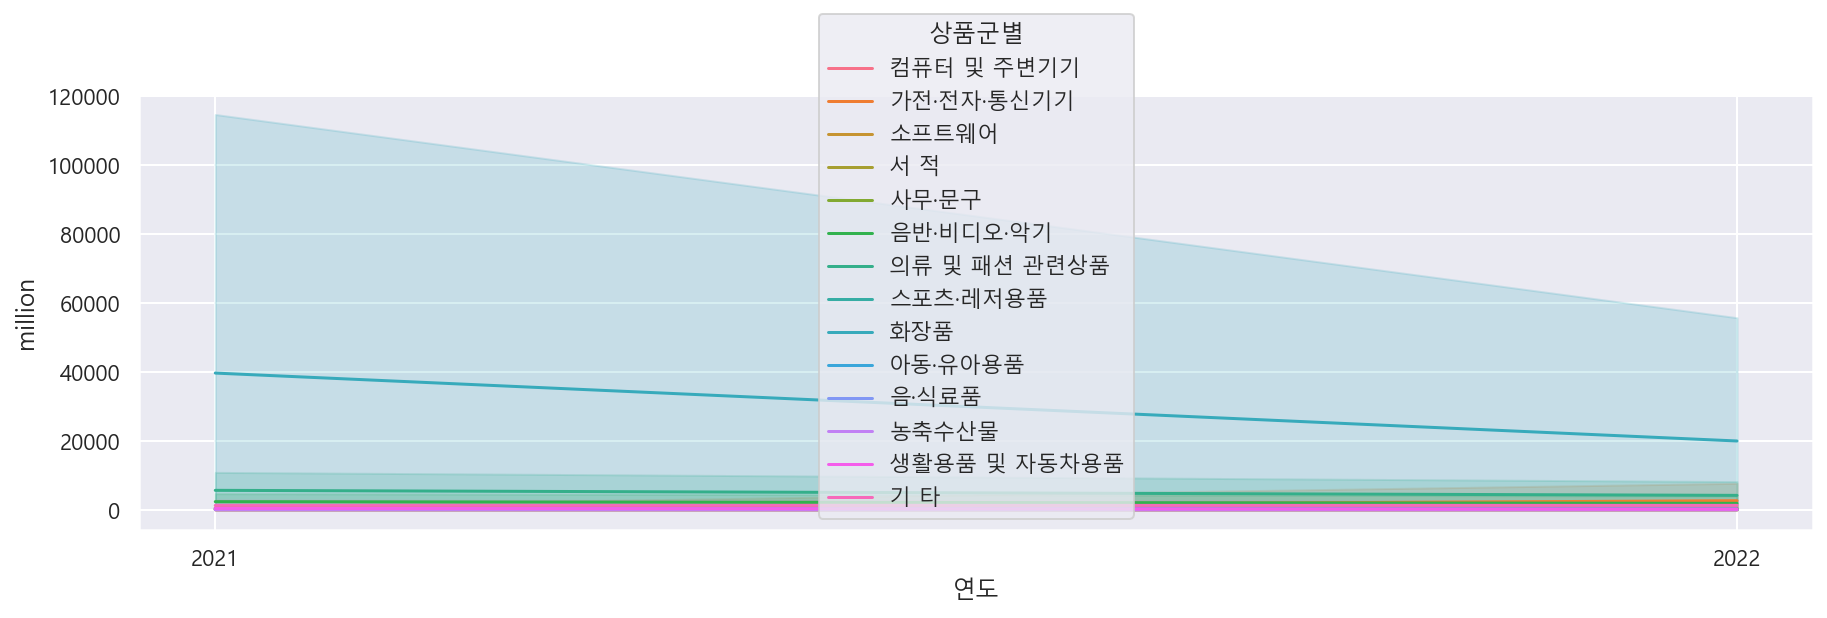

In [285]:
plt.figure(figsize=(15, 4))
sns.lineplot(x='연도', y='million', data=df, hue='상품군별')

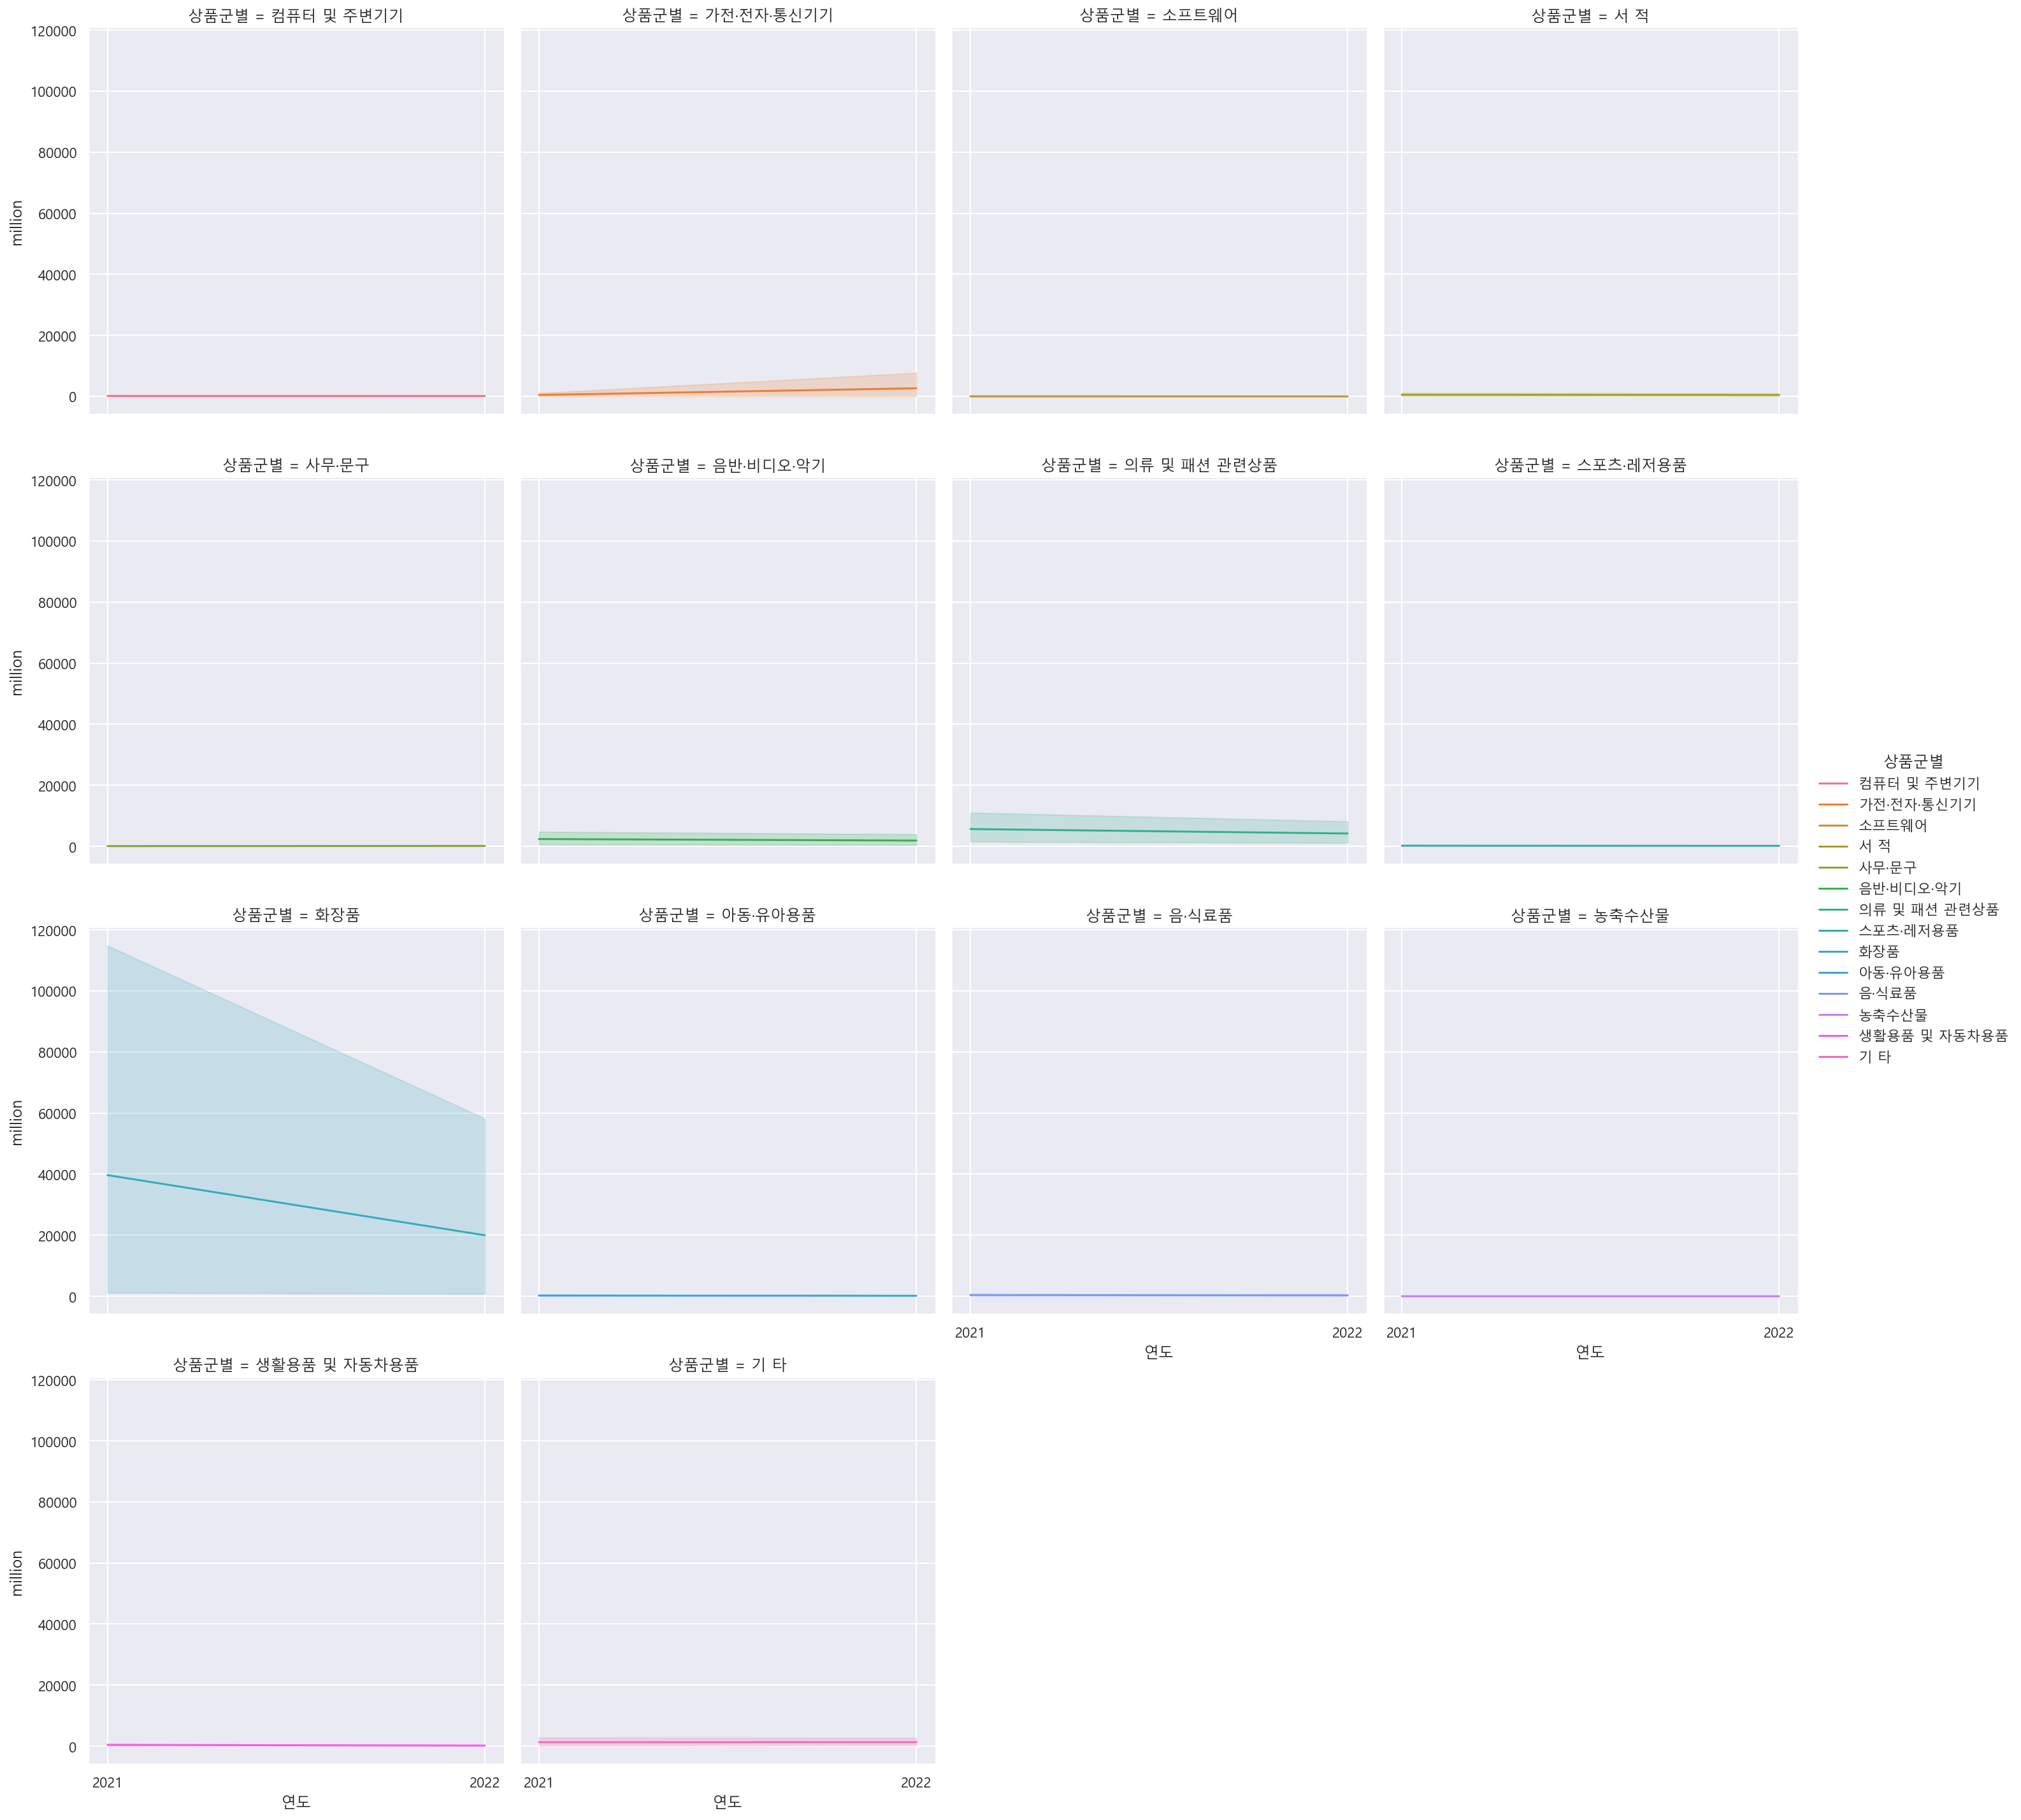

In [286]:
sns.relplot(x='연도', y='million', data=df, hue='상품군별',
          col='상품군별', col_wrap=4, kind='line')

In [287]:
# '~' 물결표시는 not 을 의미함

df_sub=df[~df['상품군별'].isin(['화장품'])] #상품군별에 화장품이 아닌 것들
df_sub

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
49,미국,컴퓨터 및 주변기기,면세점,2021.4/4,0.0,2021,4
50,미국,컴퓨터 및 주변기기,면세점 이외,2021.4/4,731.0,2021,4
52,미국,가전·전자·통신기기,면세점,2021.4/4,1.0,2021,4
53,미국,가전·전자·통신기기,면세점 이외,2021.4/4,698.0,2021,4
55,미국,소프트웨어,면세점,2021.4/4,0.0,2021,4
...,...,...,...,...,...,...,...
893,기타,농축수산물,면세점 이외,2022.1/4 p),10.0,2022,1
895,기타,생활용품 및 자동차용품,면세점,2022.1/4 p),0.0,2022,1
896,기타,생활용품 및 자동차용품,면세점 이외,2022.1/4 p),267.0,2022,1
898,기타,기 타,면세점,2022.1/4 p),0.0,2022,1


In [288]:
#상품군별에 화장품인 것들을 구할 때

#df_sub=df[df['상품군별'].isin(['화장품'])]
#df_sub

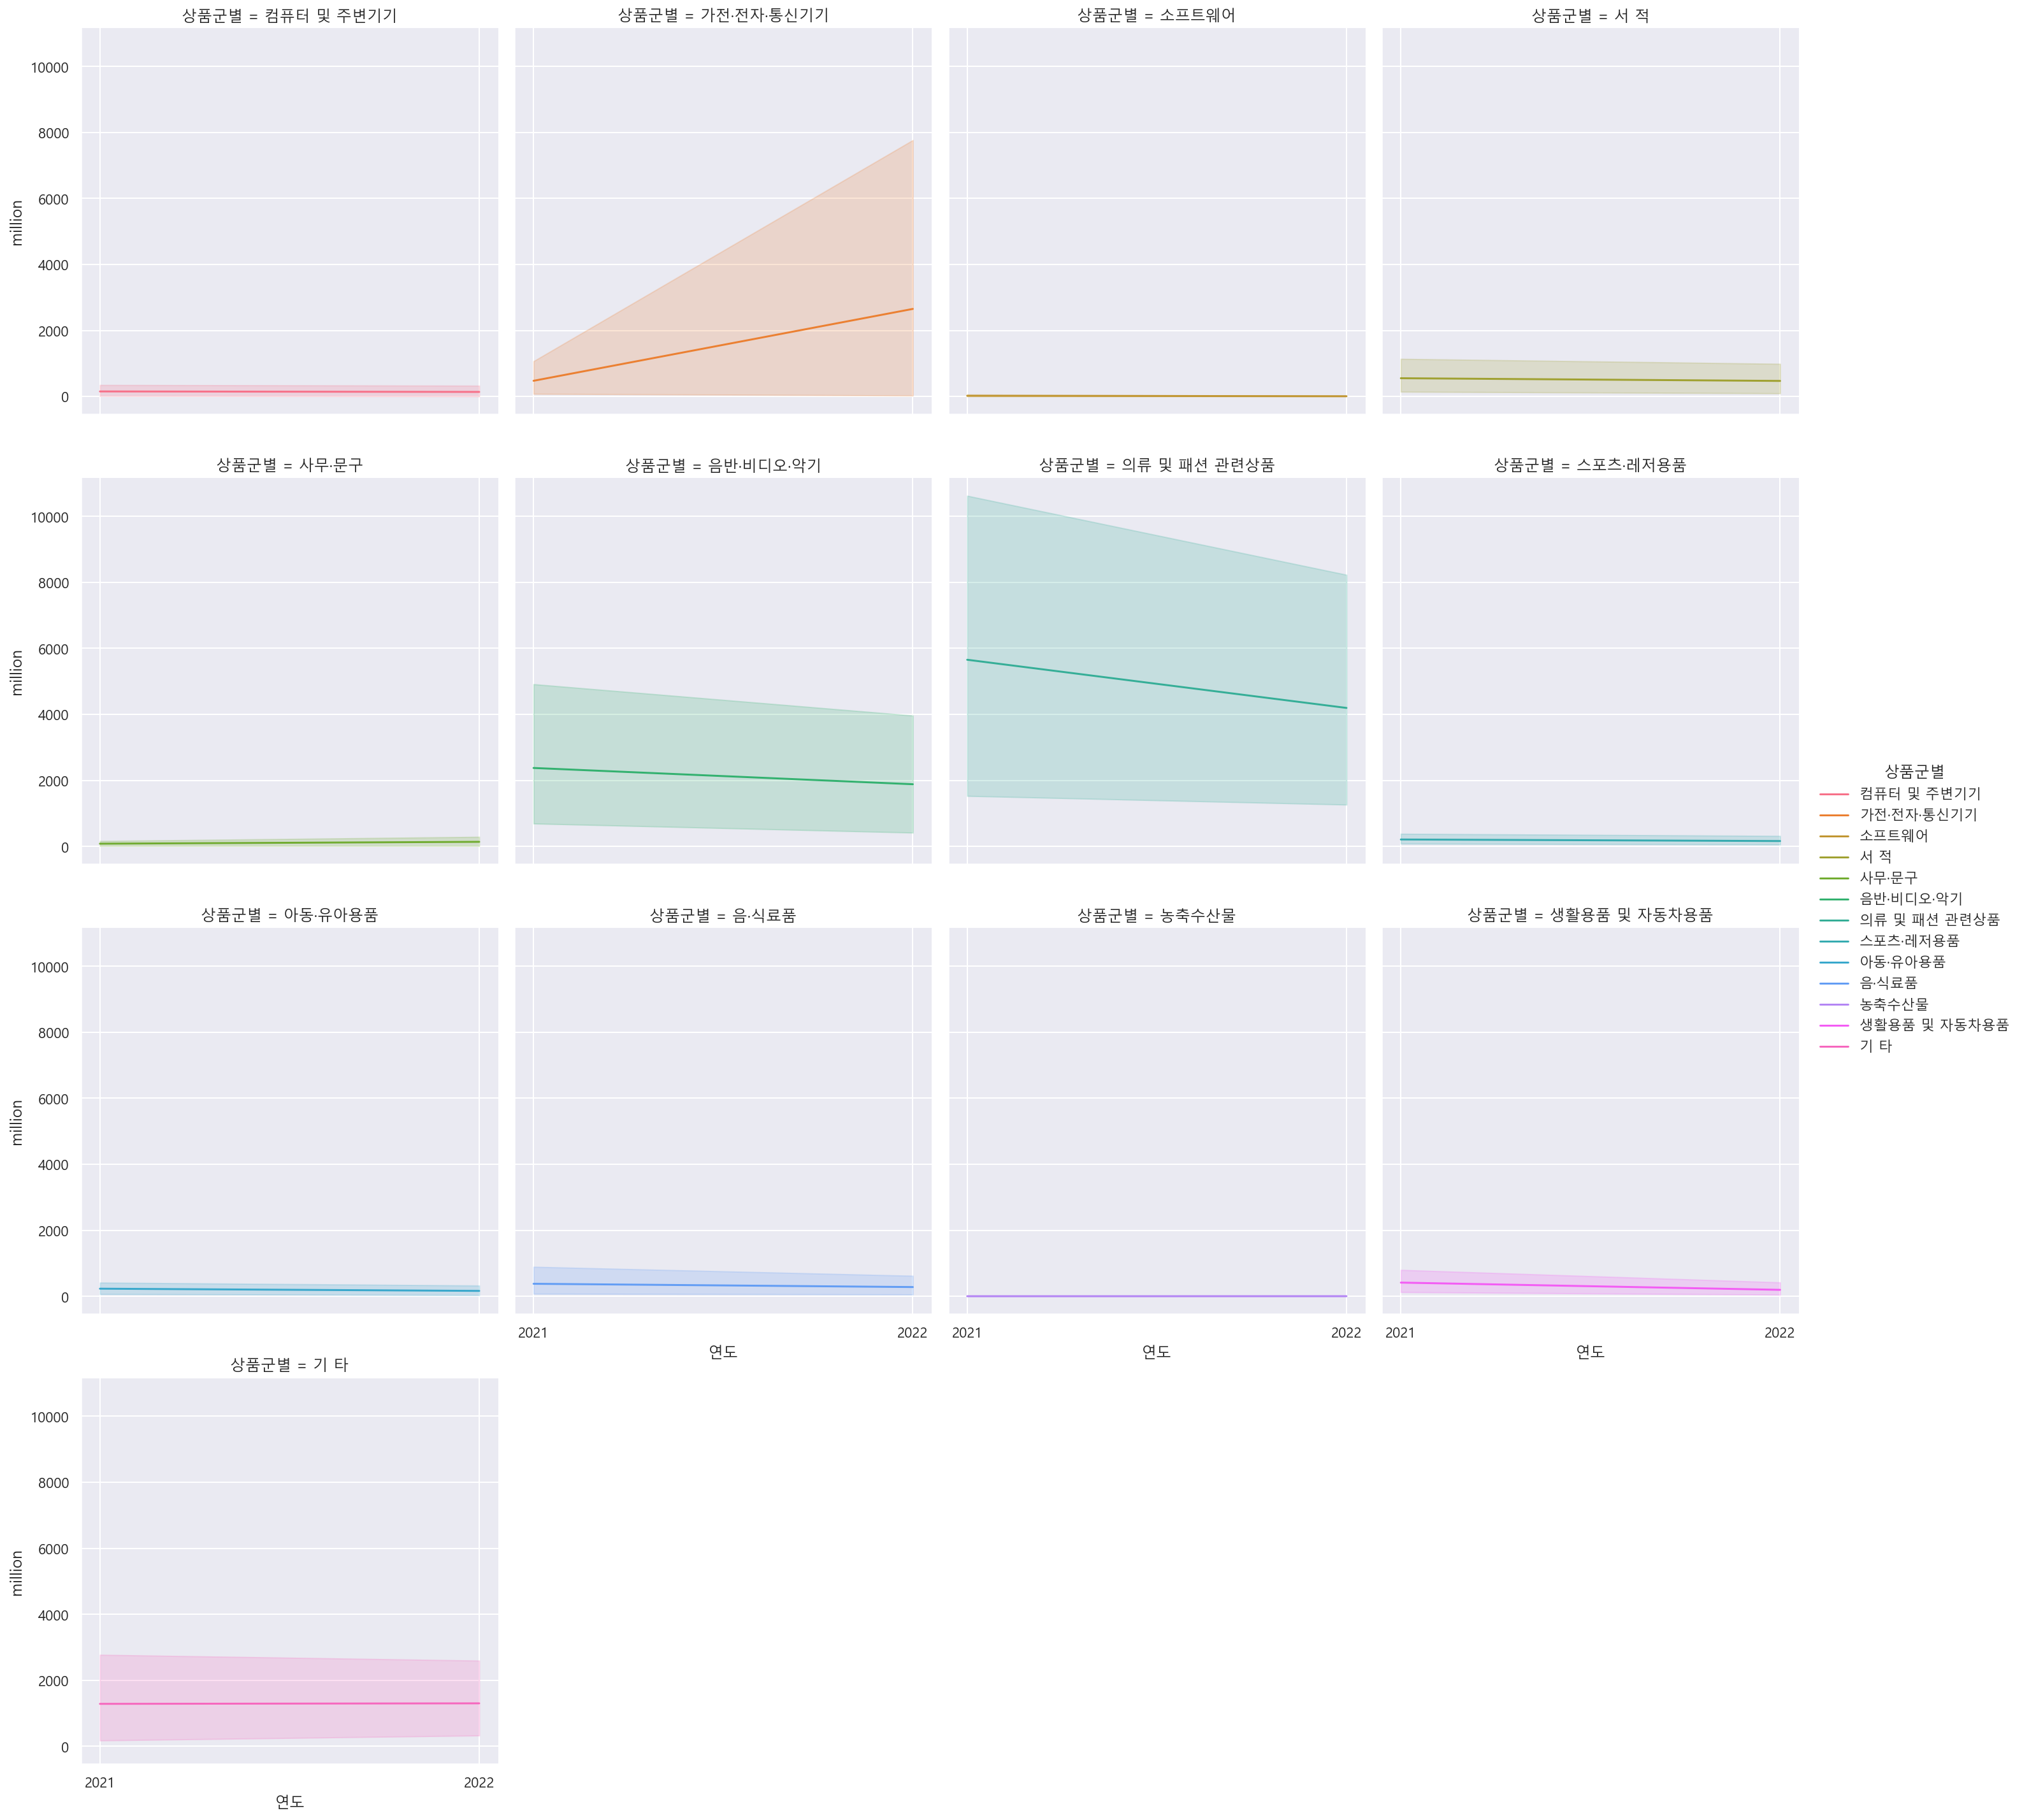

In [289]:
sns.relplot(x='연도', y='million', data=df_sub, 
            hue='상품군별', col='상품군별', col_wrap=4, kind='line')

# *  화장품의 온라인쇼핑 해외직접판매액

In [291]:
df_cosmetic = df[(df['상품군별']=='화장품')]
plt.figure(figsize=(15,4))

<Figure size 1080x288 with 0 Axes>

<Figure size 1080x288 with 0 Axes>

<AxesSubplot:xlabel='기간', ylabel='million'>

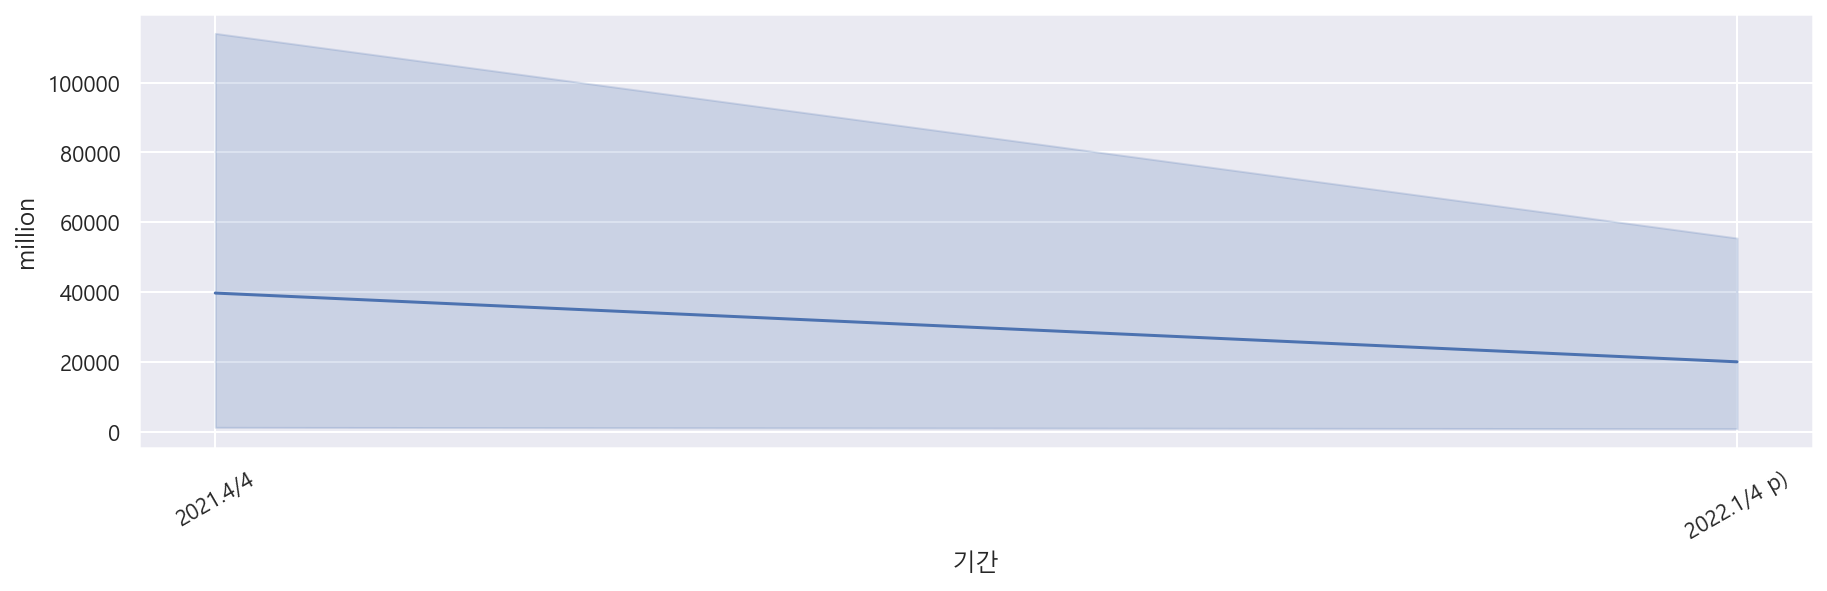

In [292]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x='기간', y='million')

<AxesSubplot:xlabel='기간', ylabel='million'>

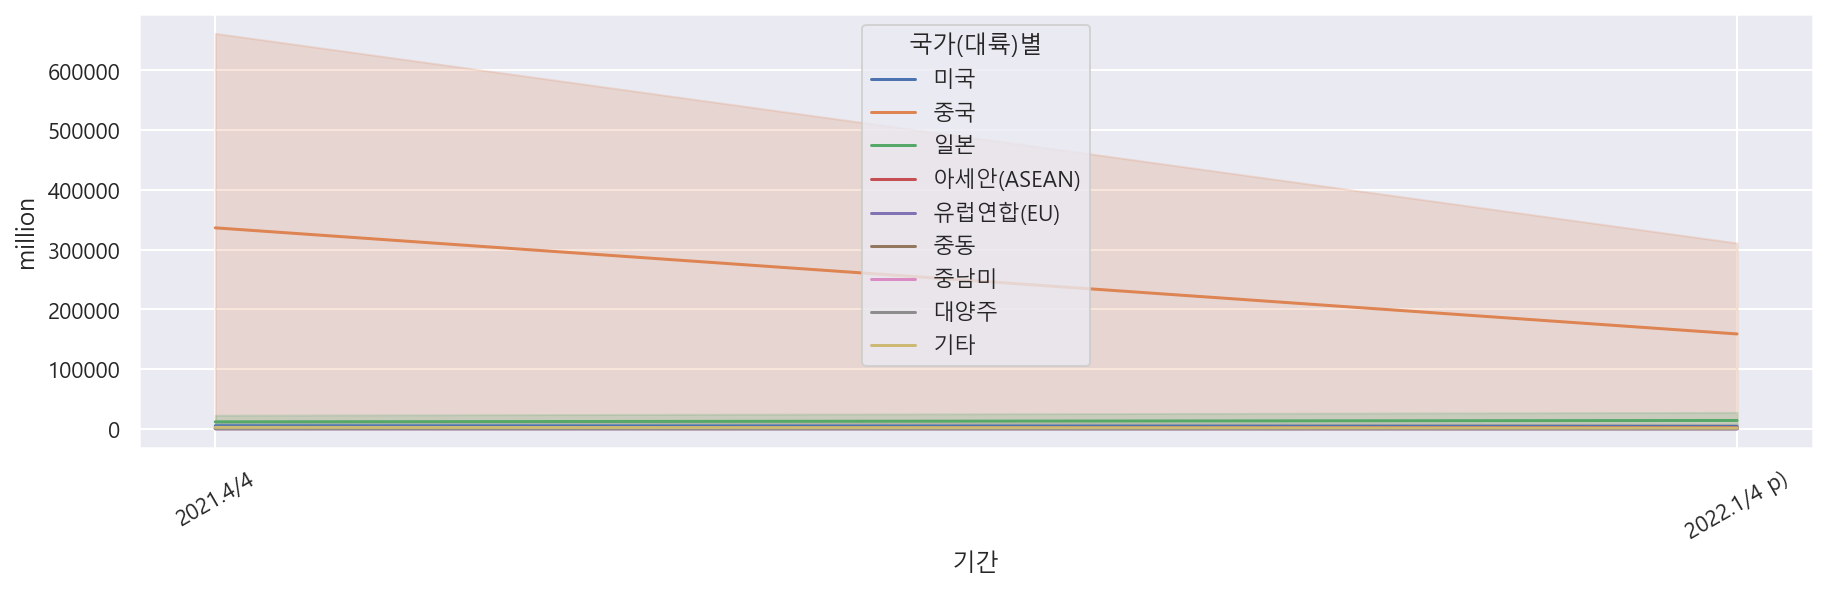

In [293]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x='기간', y='million', hue='국가(대륙)별')

<AxesSubplot:xlabel='기간', ylabel='million'>

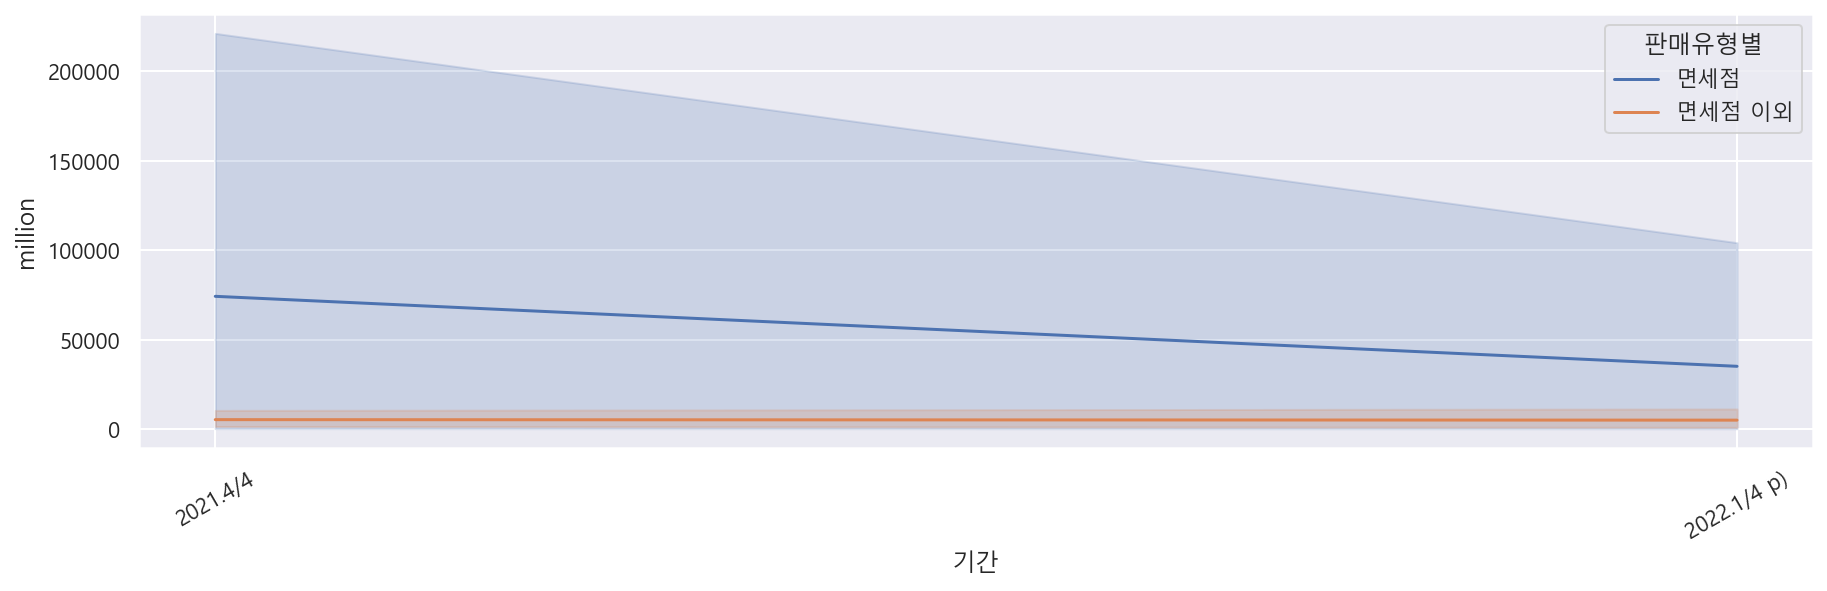

In [294]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x='기간', y='million', hue='판매유형별')

# * 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

In [300]:
df_fashion = df[df['상품군별'].str.contains('의류')]
df_fashion

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
67,미국,의류 및 패션 관련상품,면세점,2021.4/4,21.0,2021,4
68,미국,의류 및 패션 관련상품,면세점 이외,2021.4/4,29708.0,2021,4
112,중국,의류 및 패션 관련상품,면세점,2021.4/4,7703.0,2021,4
113,중국,의류 및 패션 관련상품,면세점 이외,2021.4/4,17261.0,2021,4
157,일본,의류 및 패션 관련상품,면세점,2021.4/4,3.0,2021,4
158,일본,의류 및 패션 관련상품,면세점 이외,2021.4/4,33777.0,2021,4
202,아세안(ASEAN),의류 및 패션 관련상품,면세점,2021.4/4,76.0,2021,4
203,아세안(ASEAN),의류 및 패션 관련상품,면세점 이외,2021.4/4,7740.0,2021,4
247,유럽연합(EU),의류 및 패션 관련상품,면세점,2021.4/4,1.0,2021,4
248,유럽연합(EU),의류 및 패션 관련상품,면세점 이외,2021.4/4,1406.0,2021,4


<AxesSubplot:title={'center':'의류 및 패션관련 상품'}, xlabel='기간', ylabel='million'>

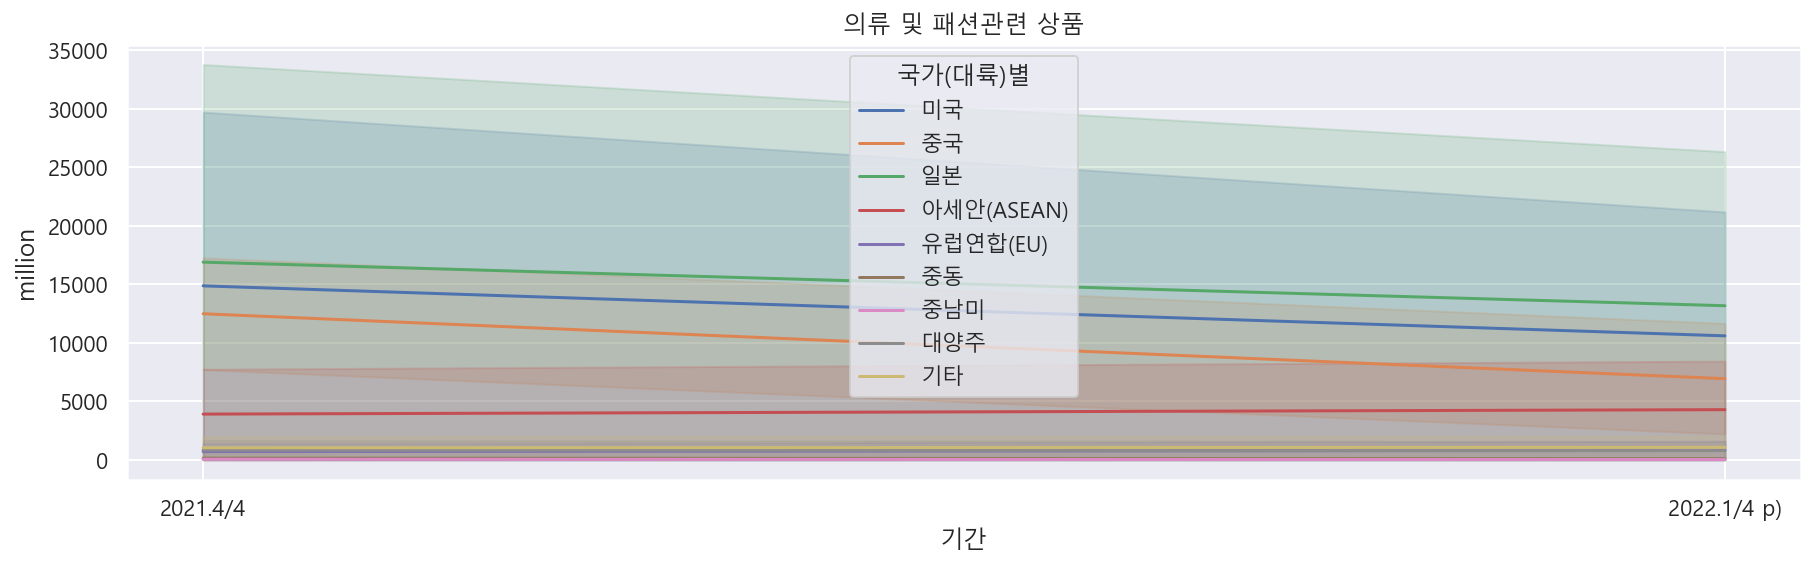

In [301]:
df_fashion = df[df['상품군별'].str.contains('의류')]

plt.figure(figsize=(15,4))
plt.title('의류 및 패션관련 상품')
sns.lineplot(data=df_fashion, x='기간', y='million', hue='국가(대륙)별')

# *데이터 집계

In [303]:
df_fashion

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
67,미국,의류 및 패션 관련상품,면세점,2021.4/4,21.0,2021,4
68,미국,의류 및 패션 관련상품,면세점 이외,2021.4/4,29708.0,2021,4
112,중국,의류 및 패션 관련상품,면세점,2021.4/4,7703.0,2021,4
113,중국,의류 및 패션 관련상품,면세점 이외,2021.4/4,17261.0,2021,4
157,일본,의류 및 패션 관련상품,면세점,2021.4/4,3.0,2021,4
158,일본,의류 및 패션 관련상품,면세점 이외,2021.4/4,33777.0,2021,4
202,아세안(ASEAN),의류 및 패션 관련상품,면세점,2021.4/4,76.0,2021,4
203,아세안(ASEAN),의류 및 패션 관련상품,면세점 이외,2021.4/4,7740.0,2021,4
247,유럽연합(EU),의류 및 패션 관련상품,면세점,2021.4/4,1.0,2021,4
248,유럽연합(EU),의류 및 패션 관련상품,면세점 이외,2021.4/4,1406.0,2021,4


In [302]:
pivot = df_fashion.pivot_table(
    index='국가(대륙)별', values='million',
    columns='연도', aggfunc='sum') 
# in국가별로 연도별 million의 합계를 내서 표로 만들어라
pivot

연도,2021,2022
국가(대륙)별,,
기타,2068.0,2139.0
대양주,1675.0,1581.0
미국,29729.0,21186.0
아세안(ASEAN),7816.0,8574.0
유럽연합(EU),1407.0,1600.0
일본,33780.0,26333.0
중국,24964.0,13868.0
중남미,95.0,47.0
중동,273.0,183.0


# * 연산결과를 시각적으로 보기

<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

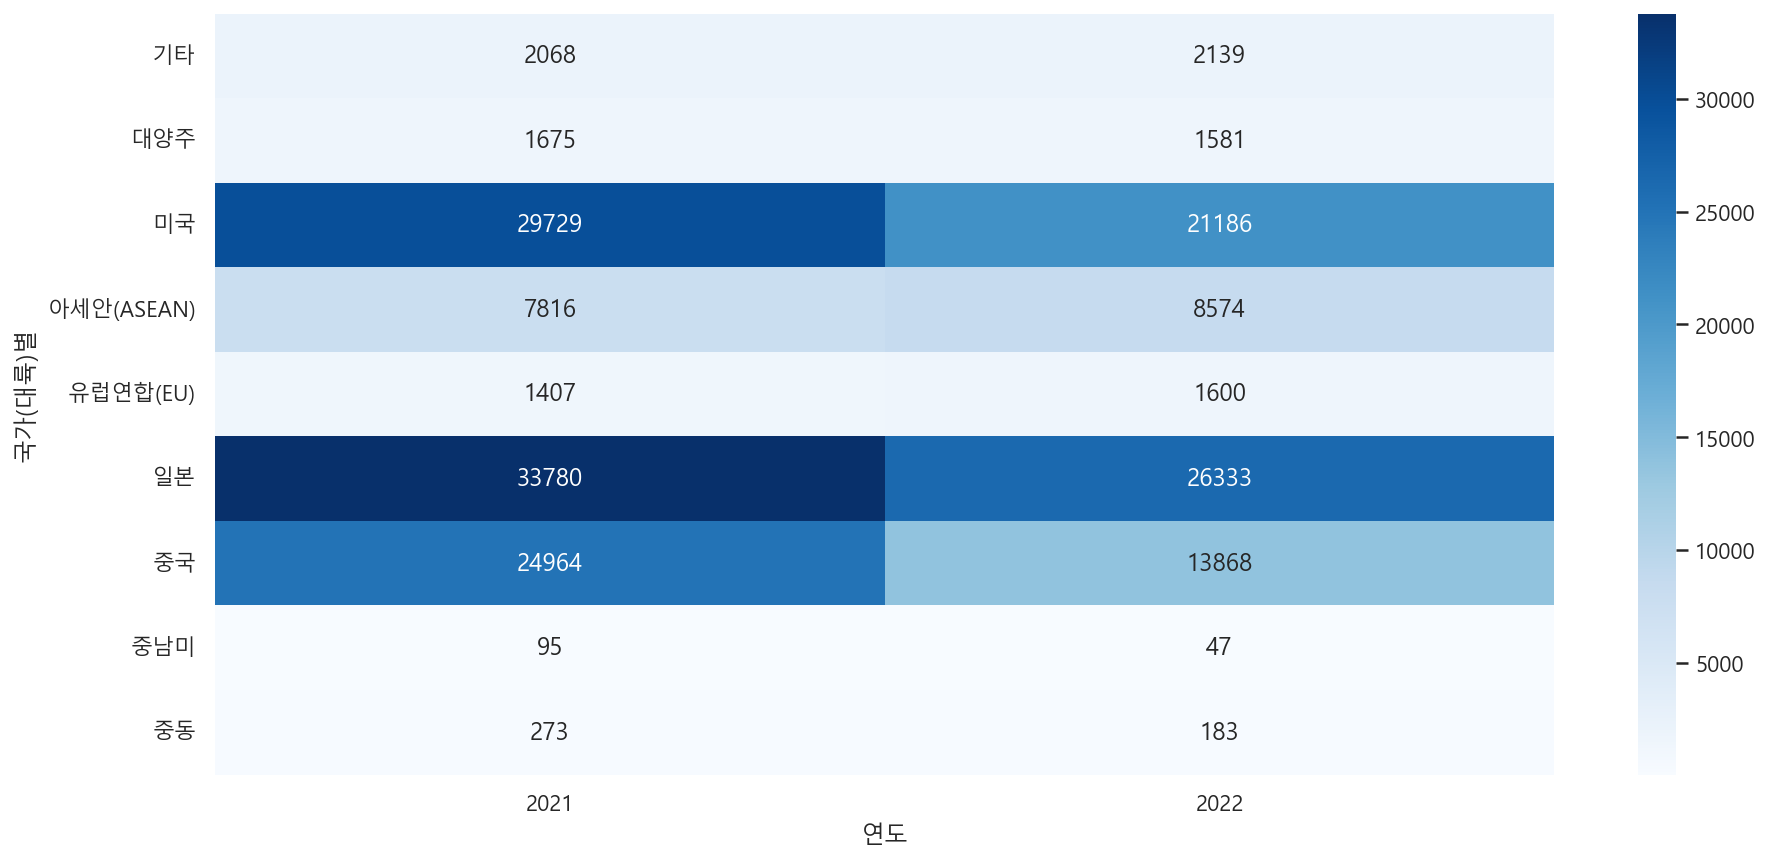

In [304]:
plt.figure(figsize=(15,7))
sns.heatmap(pivot, cmap='Blues', annot=True, fmt='.0f')

# cmap 그래프의 디자인
# annot 숫자값 표시 여부 결정. True면 숫자가 나타남. False면 숫자가 나타나지 않음.
# fmt 소숫점 몇 번 째 짜리까지 표시하는지 결정

<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

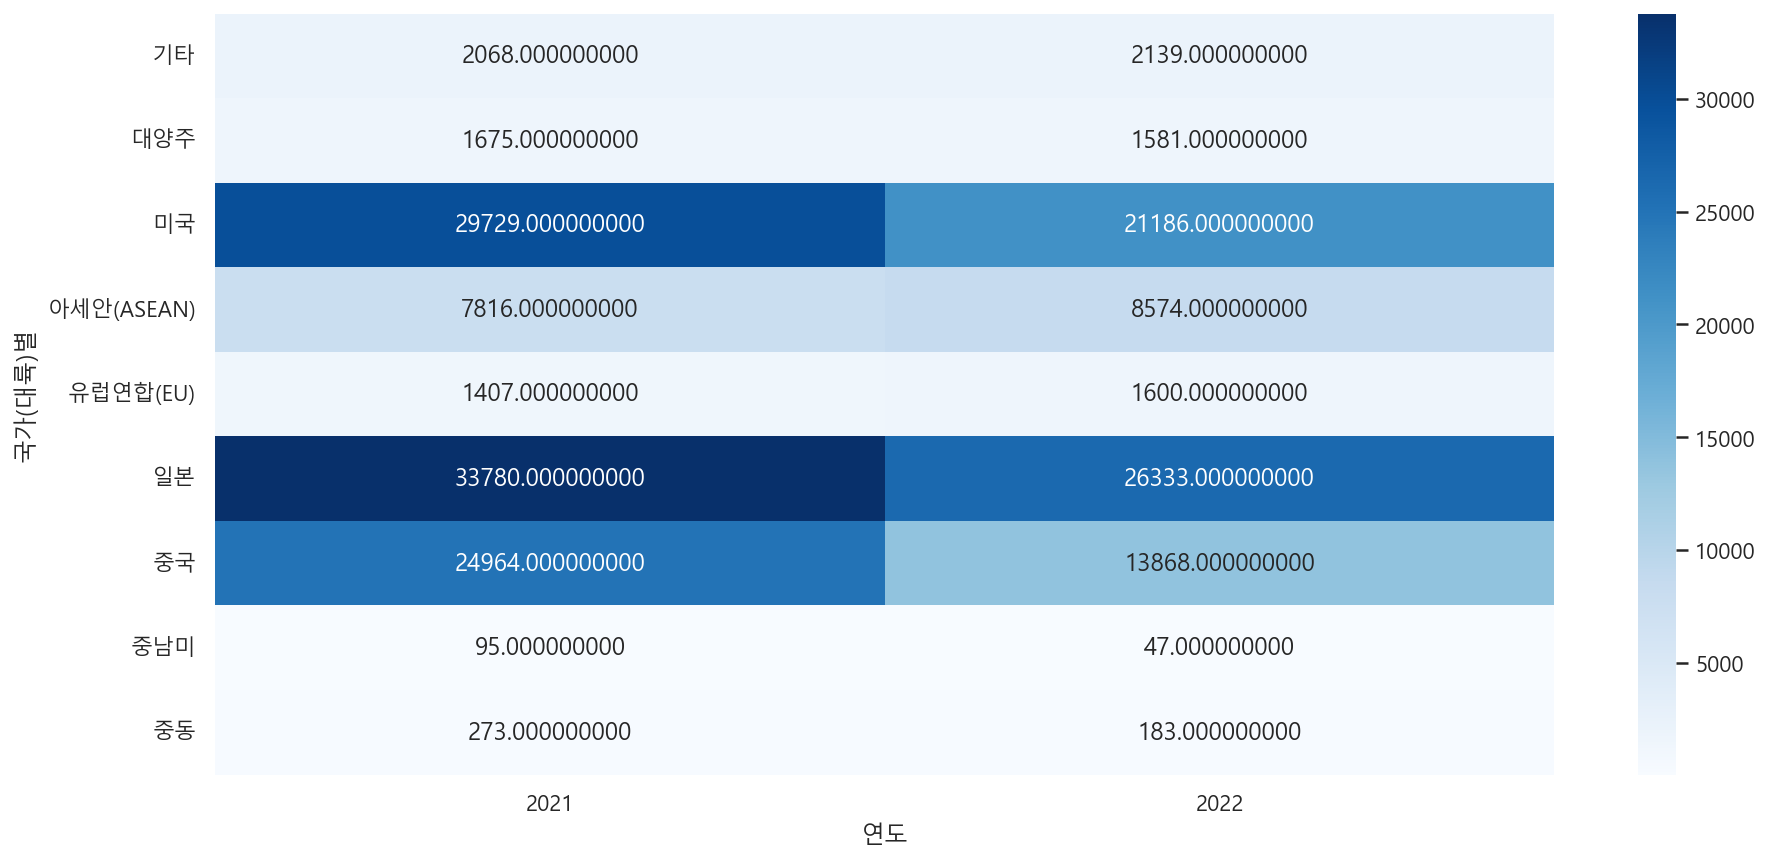

In [308]:
plt.figure(figsize=(15,7))
sns.heatmap(pivot, cmap='Blues', annot=True, fmt='.9f')

# * 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

<AxesSubplot:xlabel='연도', ylabel='million'>

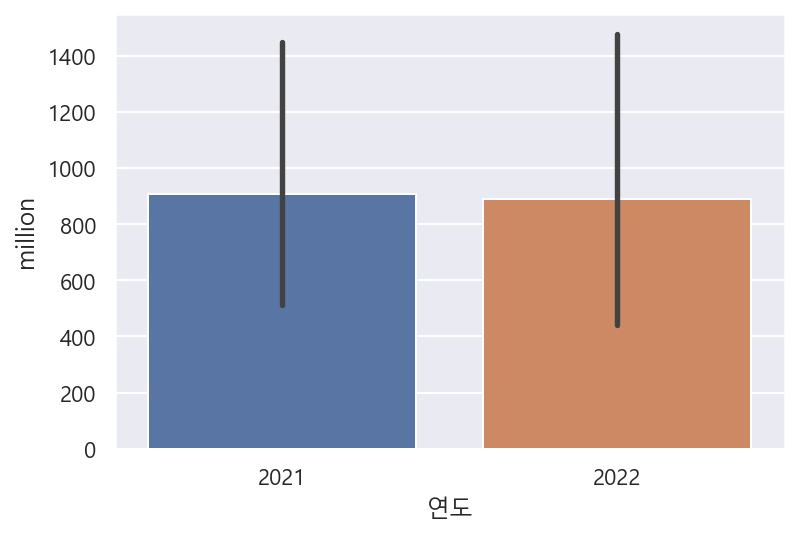

In [305]:
sns.barplot(x='연도', y='million', data=df_sub)

<AxesSubplot:xlabel='연도', ylabel='million'>

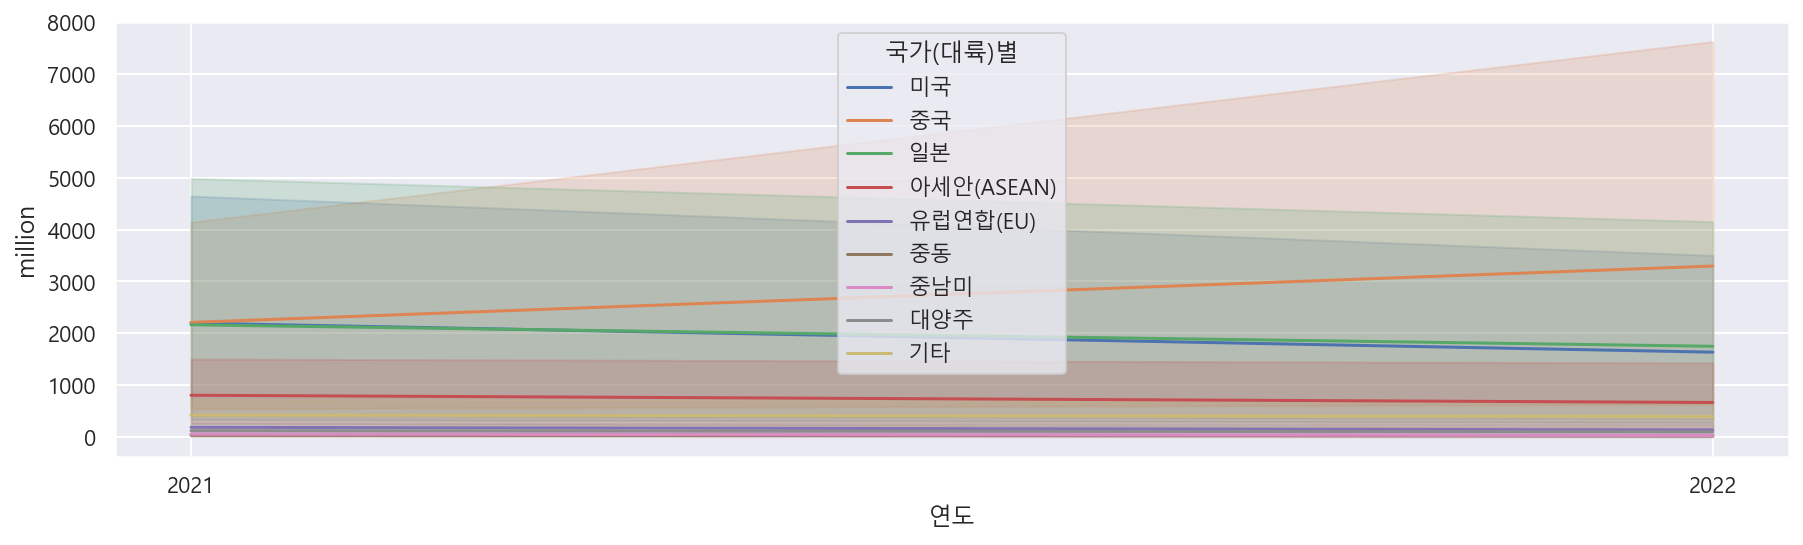

In [306]:
plt.figure(figsize=(15,4))
sns.lineplot(x='연도', y='million', data=df_sub, hue='국가(대륙)별')

<AxesSubplot:xlabel='연도', ylabel='million'>

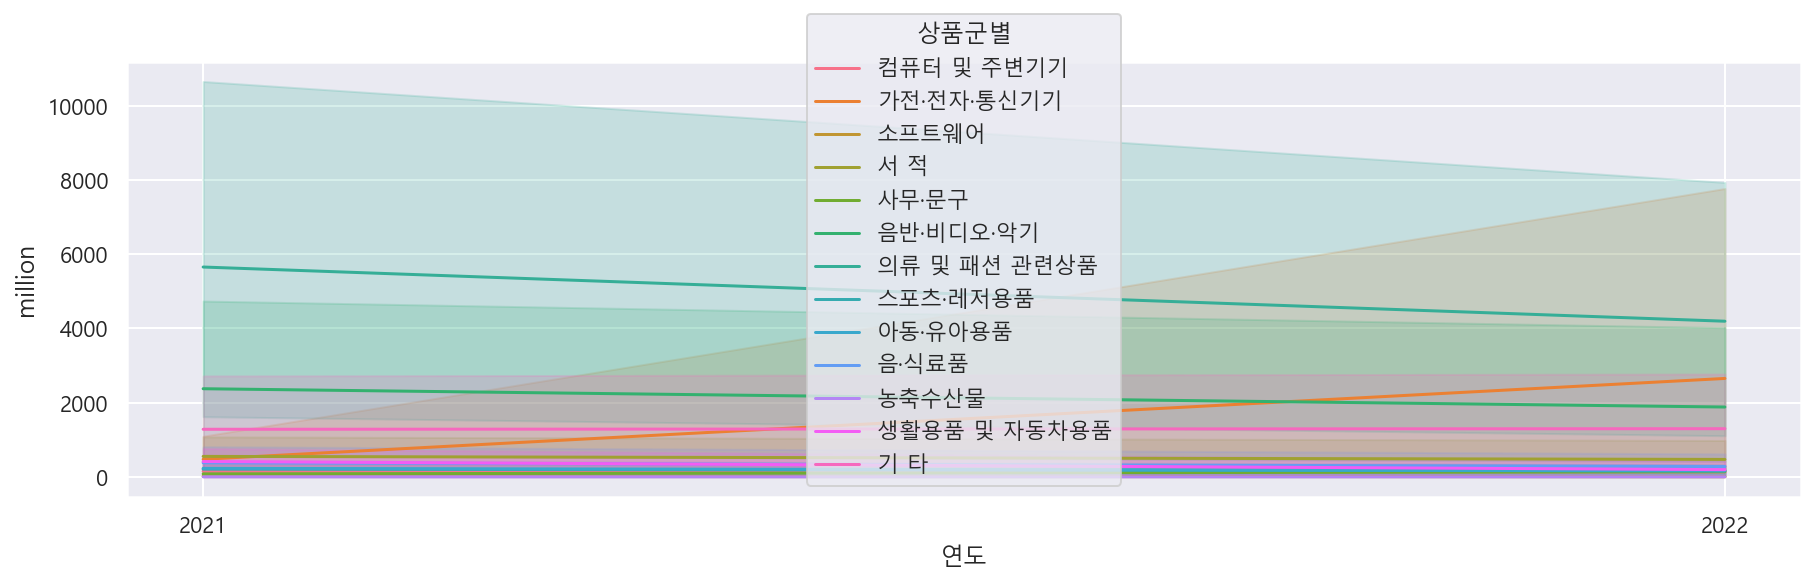

In [307]:
plt.figure(figsize=(15,4))
sns.lineplot(x='연도', y='million', data=df_sub, hue='상품군별')